In [3]:
from collections import Counter
import json
import math
import random
import re

import jieba
import jieba.analyse
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
#-*- encoding:utf-8 -*-
from __future__ import print_function

import sys
try:
    reload(sys)
    sys.setdefaultencoding('utf-8')
except:
    pass

import codecs
from textrank4zh import TextRank4Keyword, TextRank4Sentence

In [4]:
class KMeans:
    def cal_dist(self, p0, p1):
        """
        比較兩點的距離
        """
        return np.sqrt(np.sum((p0-p1)**2))

    def kmeans(self, datapoints, k=2):
        # 定義資料維度
        d = datapoints.shape[1]
        # 最大的迭代次數
        Max_Iterations = 1000

        cluster = np.zeros(datapoints.shape[0])
        prev_cluster = np.ones(datapoints.shape[0])

        cluster_centers = []
        for i in range(k):
            cluster_centers += [random.choice(datapoints)]

        iteration = 0
        while np.array_equal(cluster, prev_cluster) is False or iteration > Max_Iterations:
            iteration += 1
            prev_cluster = cluster.copy()

            # 將每一個點做分群
            for idx, point in enumerate(datapoints):
                min_dist = float("inf")
                for c, cluster_center in enumerate(cluster_centers):
                    dist = self.cal_dist(point, cluster_center)
                    if dist < min_dist:
                        min_dist = dist  
                        cluster[idx] = c   # 指定該點屬於哪個分群

            # 更新分群的中心
            for k in range(len(cluster_centers)):
                new_center = np.zeros(d)
                members = 0
                for point, c in zip(datapoints, cluster):
                    if c == k:
                        new_center += point
                        members += 1
                if members > 0:
                    new_center = new_center / members
                cluster_centers[k] = new_center

        return cluster

In [10]:

dict_1 = {}
news_most_related_words = []
for tt in range(0,2):  
    a=str(tt)+'.txt'
    text = codecs.open(str(a), 'r', 'utf-8').read()
    tr4w = TextRank4Keyword()

    tr4w.analyze(text=text, lower=True, window=2)  # py2中text必须是utf8编码的str或者unicode对象，py3中必须是utf8编码的bytes或者str对象
    top_10 = []
   # print( '关键词：' )
    for item in tr4w.get_keywords(10, word_min_len=1):
        #print(item.word)
        
        #紀錄文章10個關鍵字
        top_10.append(item.word)
        #print(top_10)
    rank_1=sorted(dict_1.items(), key =lambda x : x[1],reverse=True)
    
    news_most_related_words.append(top_10)



In [11]:
news_most_related_words

[['美國', 'fed', '通膨', '衰退', '烏克蘭', '會', '成長', '歐洲', '波動', '俄羅斯'],
 ['讓', '取代', '漲', '不了', '夢', '醒', '高點', '時能', '離開', '最初']]

In [14]:
news_most_related_words.values

<function dict.values>

In [ ]:
# 將字詞向量化 BOW
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([' '.join(w) for w in list(news_most_related_words.values())]) 
X = X.toarray()

In [18]:
np.set_printoptions(threshold=np.inf)
X


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [24]:
X.shape

(1000, 2340)

In [25]:
from sklearn.decomposition import PCA

In [40]:
myPCA=PCA(2)

In [41]:
myPCA.fit(X)
scores=myPCA.transform(X)

In [45]:
import seaborn as sns

<AxesSubplot:>

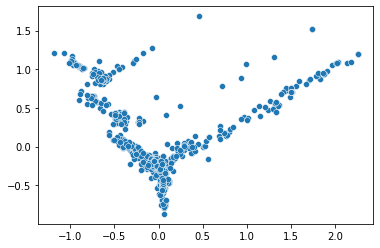

In [46]:
sns.scatterplot(x=scores[:,0],y=scores[:,1])

In [23]:
import matplotlib.pyplot as plt           

In [ ]:
plt.scatter() 

In [22]:
country_list = []
for i in range(0,1000):
    country_list.append(i)

k = 5
K = KMeans()
speech_cluster_result = K.kmeans(X, k)
cluster = [[] for _ in range(k)]

for idx, c in enumerate(speech_cluster_result):
    cluster[int(c)].append(country_list[idx])
    
for c, result in enumerate(cluster):
    print('Cluster {}: {}'.format(c, ' '.join('%s' %num for num in result)))

Cluster 0: 6 26 36 46 58 67 69 201 514 535 537 538 552 559 561 576 582 589 636 686 702 715 719 749 801 815 822 846 852 914 944 947 970 971
Cluster 1: 2 19 21 24 33 38 66 91 127 138 159 203 210 227 237 258 260 264 273 279 284 301 306 315 335 337 342 351 365 392 411 467 469 470 484 487 512 540 544 546 549 556 562 564 565 590 594 605 606 610 614 616 653 661 670 685 699 743 744 810 816 824 893 904 916 922 924 936 951 973 990 998
Cluster 2: 10 18 53 68 77 80 81 85 92 111 118 125 150 185 193 197 199 202 218 234 236 261 274 278 281 299 314 316 331 346 352 374 377 384 397 408 409 415 421 434 461 483 502 518 521 533 558 567 573 599 613 619 623 626 643 651 663 665 668 676 680 683 691 696 703 706 713 728 731 733 786 788 817 832 858 868 881 887 888 891 896 905 920 931 942 952 954 955 958 969 980 988 992 993 995
Cluster 3: 0 1 3 4 5 7 8 9 11 12 13 14 15 16 17 20 22 23 25 27 28 29 31 32 34 35 37 39 40 41 42 43 44 45 47 48 49 50 51 54 55 56 57 59 60 61 62 64 65 70 71 72 73 74 75 76 78 79 82 83 84 86 